<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo1_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos valores de procedimetnos do Data SUS 

In [87]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [88]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'

In [90]:
# preparando a base: lendo arquivo, incluindo região e ajustando nome dos estados
# importando os números
dados = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/Aprendendo/master/A165345189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# criando o campo do códgio da região
dados["Cod_Região"]=dados["Unidade da Federação"].str[0]
# inclui os nomes das regiões
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")
# inclui os nomes das regiões em dados
dados = dados.join(Base_regioes, on="Cod_Região")
# retirando os números de antes do nome dos estados
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.strip()
#verificando a marcação de Região
dados[["Região","Unidade da Federação","Total"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região,Unidade da Federação,Total
0,Norte,Rondônia,"1,073,782,138.81"
1,Norte,Acre,"475,290,315.34"
2,Norte,Amazonas,"2,041,003,727.86"
3,Norte,Roraima,"349,395,453.66"
4,Norte,Pará,"4,950,135,530.02"
5,Norte,Amapá,"326,885,943.09"
6,Norte,Tocantins,"1,109,478,655.20"
7,Nordeste,Maranhão,"4,120,818,450.35"
8,Nordeste,Piauí,"2,426,540,822.88"
9,Nordeste,Ceará,"7,018,565,512.36"


In [91]:
#selecionando as colunas
# selecionando apenas colunas com valores para todas as linhas
col_usaveis = dados.mean().index.tolist()
# adicionando coluna não numérica com os titulos das linhas
col_usaveis.insert(0, "Unidade da Federação")
# excluindo a coluna TOTAL e Cod_Região
del col_usaveis[-2:]
# excluindo colunas iniciais com valores distorcidos
del col_usaveis[1:7]
# confirmando se realmente foram excluidas
# col_usaveis[-5:]
col_usaveis[:5]

['Unidade da Federação', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai']

In [92]:
# criando a base apenas com a seleção de coluna
base_usavel = dados[col_usaveis]
# definindo index da base
base_usavel = base_usavel.set_index("Unidade da Federação")
# colocando em ordem alfabética
base_usavel = base_usavel.sort_index()
# validações
# base_usavel.head()
base_usavel.tail()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Roraima,"771,687.83","876,091.18","896,952.53","1,027,288.73","938,293.54","1,004,340.44","1,045,291.11","1,003,740.89","1,055,063.43","1,223,200.73","1,236,529.18","1,186,281.36","1,106,225.18","1,422,690.18","1,377,859.19","1,363,883.01","1,346,660.89","1,371,019.37","1,529,696.18","1,573,418.68","1,517,391.92","1,597,811.24","1,536,941.82","1,617,781.76","1,452,295.35","1,817,004.16","1,715,762.10","1,933,733.03","1,849,065.95","1,877,204.62","2,046,063.98","1,939,488.67","1,757,675.71","1,528,245.34","1,485,166.60","1,604,886.45","1,220,176.72","1,276,120.86","1,379,942.19","1,679,122.67",...,"2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,306,119.95","2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,531,874.44","3,193,708.89","3,557,821.99","4,172,285.82","5,427,226.70","4,192,540.54","3,653,281.61","3,350,272.96","2,977,820.70"
Santa Catarina,"24,409,572.92","27,483,480.50","27,806,641.44","28,354,279.52","28,993,292.76","30,049,455.69","28,887,854.62","30,725,718.78","31,274,395.62","29,998,635.78","30,454,606.34","32,082,203.52","29,845,655.79","34,921,069.20","33,677,499.55","34,053,483.16","35,685,005.53","38,337,704.14","37,110,055.24","36,516,827.06","36,207,968.50","35,451,417.03","34,360,136.47","34,093,173.06","33,608,566.26","38,776,130.28","36,705,001.71","38,085,803.13","37,686,277.05","38,574,085.03","40,256,188.61","37,840,220.77","38,963,855.34","38,297,339.52","34,736,715.57","38,839,715.96","37,219,889.13","40,786,024.82","39,123,310.67","42,630,366.40",...,"61,161,248.27","60,108,334.41","61,237,932.18","63,709,506.55","63,097,939.95","59,369,745.87","64,023,229.84","61,587,018.03","53,936,648.18","59,452,473.88","57,186,997.64","61,547,622.60","62,803,248.17","65,855,153.42","61,848,049.62","68,759,673.19","64,503,540.72","66,115,892.58","67,767,791.67","62,660,639.01","58,370,708.85","64,710,026.00","59,789,829.83","56,978,333.73","51,415,639.43","58,105,335.17","63,120,191.28","79,475,796.74","75,100,598.66","67,887,065.93","71,153,133.52","80,859,425.73","78,348,461.09","72,801,759.44","79,248,048.22","90,645,709.72","89,402,782.82","96,380,363.46","79,255,511.80","49,791,777.84"
Sergipe,"4,636,850.76","5,017,838.07","5,265,951.03","5,367,094.94","4,981,036.36","4,928,822.87","4,543,252.50","4,525,676.82","4,566,052.38","4,716,241.96","4,272,627.88","5,037,054.40","4,983,217.59","6,504,862.57","5,772,732.46","6,111,674.22","5,789,895.43","6,122,676.14","6,105,674.90","6,019,912.61","5,852,499.57","5,722,988.22","5,201,100.49","6,261,031.57","5,754,032.25","7,057,311.82","6,758,264.65","7,452,360.44","5,958,403.64","6,660,243.30","7,061,516.92","6,924,628.71","6,663,604.22","6,691,150.75","6,414,642.30","6,968,224.01","6,118,138.09","6,691,472.70","6,940,307.06","7,303,909.16",...,"8,649,405.83","9,127,323.57","9,141,588.81","9,026,038.83

In [93]:
# criando um conjunto de cores excluindo as claras
import matplotlib._color_data as mcd
import random
# selecionando um conjunto de cores
cores = [i for i in mcd.CSS4_COLORS]
# removendo cores claras específicas
cores.remove("snow")
cores.remove("ivory")
cores.remove("azure")
# removendo cores claras por parte do texto
claro = [i for i in cores if "light" in i]
claro = claro + [i for i in cores if "white" in i]
claro = claro + [i for i in cores if "cream" in i]
cores = [i for i in cores if i not in claro]
# conferindo a quantidade de opções disponíveis ao fim
len(cores)

123

In [94]:
# selecionando aleatoriamente 27 cores distintas dentro do conjunto anterior
random.seed(400)
paleta = random.sample(cores, 27)
paleta


['deepskyblue',
 'mediumseagreen',
 'darkseagreen',
 'royalblue',
 'seagreen',
 'cadetblue',
 'mediumslateblue',
 'lime',
 'rosybrown',
 'tan',
 'lavender',
 'grey',
 'steelblue',
 'skyblue',
 'hotpink',
 'mediumpurple',
 'wheat',
 'darkturquoise',
 'khaki',
 'darkolivegreen',
 'orangered',
 'indianred',
 'cyan',
 'peru',
 'black',
 'darksalmon',
 'navy']

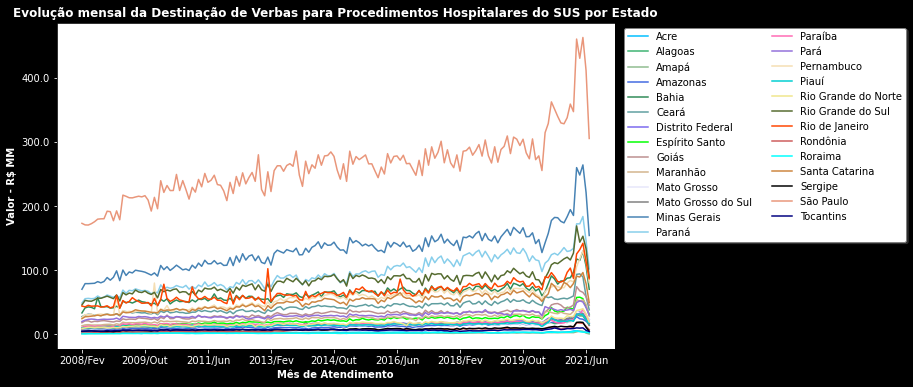

In [96]:
# construindo o gráfico e já definindo a utilização das cores selecionadas acima
ax = base_usavel.T.plot(figsize=(10,6), color = paleta)
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(1.27, 1),
          ncol=2, fancybox=True, shadow=True)
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS por Estado", fontweight="bold", color="white")

plt.show()

In [97]:
# ordena pela soma das linhas
base_usavel = (base_usavel
  .assign(total=base_usavel.sum(axis=1))  # Adiciona uma coluna total temporariamente
  .sort_values(by='total', ascending=False)  # ordena pelo total
  .iloc[:, :-1]) # exclui a coluna temporaria total
# apartando os 5 estados com maior valor
estados = base_usavel.head().index.tolist()
estados

['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro']

In [49]:
len(base_usavel.columns)

162

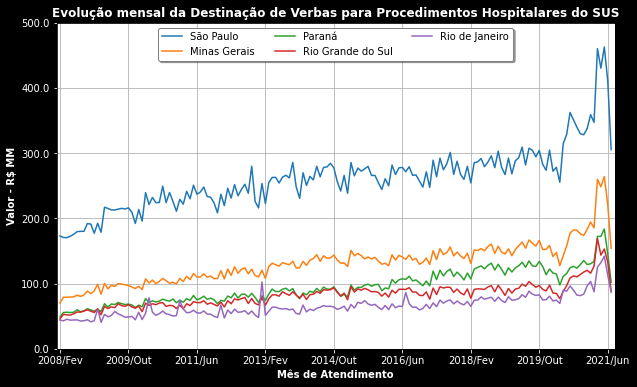

In [98]:
# Construindo grafico dos 5 estados com maior valor
# ax = base_usavel.loc[base_usavel.index.isin(estados)].T.plot(figsize=(10,6))
ax = base_usavel.T[estados].plot(figsize=(10,6))
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=3, fancybox=True, shadow=True)
# definindo limites do eixo x
ax.set_xlim(-1, 162)
ax.set_ylim(0, 500*escalaY)
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS", fontweight="bold", color="white")
plt.grid()
plt.show()


In [99]:
# adicionado mais um estado na lista dos 5 maiores
estados.insert(5,"Amazonas")
estados

['São Paulo',
 'Minas Gerais',
 'Paraná',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Amazonas']

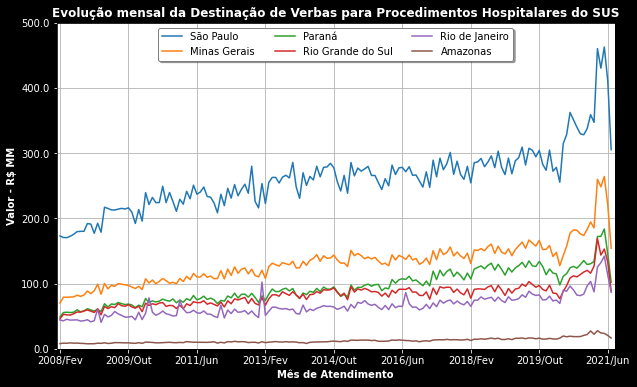

In [100]:
# Construindo grafico dos 5 estados com maior valor mais o estado adicional
ax = base_usavel.T[estados].plot(figsize=(10,6))
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=3, fancybox=True, shadow=True)
# definindo limites do eixo x
ax.set_xlim(-1, 162)
ax.set_ylim(0, 500*escalaY)
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS", fontweight="bold", color="white")
plt.grid()
plt.show()

In [101]:
# criando base apenas com os estados do sudeste
sudeste = dados.loc[dados['Região'] == "Sudeste"]
sudeste = sudeste[col_usaveis]
# definindo index da base
sudeste = sudeste.set_index("Unidade da Federação")
# colocando em ordem alfabética
sudeste = sudeste.sort_index()
# validações
sudeste[["2012/Set","2012/Out","2012/Nov","2012/Dez","2013/Jan","2013/Fev"]]

,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev
Unidade da Federação,,,,,,
Espírito Santo,"19,258,247.92","19,200,340.35","17,956,886.69","18,264,308.06","19,123,320.52","17,941,358.17"
Minas Gerais,"114,792,200.87","122,099,210.56","112,211,647.27","110,269,165.40","120,452,129.39","107,918,231.18"
Rio de Janeiro,"53,136,178.48","57,990,191.05","51,725,821.93","47,881,117.89","102,415,778.64","51,248,217.25"
São Paulo,"238,469,835.11","279,902,627.73","225,893,036.80","215,975,607.57","253,411,612.94","222,591,036.43"


# Picos de doenças
Em 2013 tivemos um pico de dengue no Rio de Janeiro no início do ano, batendo com o pico de gastos em Janeiro conforme visto acima
http://g1.globo.com/bemestar/noticia/2013/02/casos-de-dengue-no-pais-aumentam-190-no-comeco-de-2013-diz-governo.html

Também verifiquei que o ano com maior número de casos foi 2015, seguido de 2019, seguidos de 2017 e 2018 com uma contagem próxima bem abaixo dos dois primeiros (https://epocanegocios.globo.com/Brasil/noticia/2020/01/epoca-negocios-brasil-registra-segundo-ano-com-maior-numero-de-casos-de-dengue-da-historia.html). Desta forma eu não consigo relacionar um aumento dos gastos com esse pico. 

O que pode ter relação com sacionalidade vista no sudeste é o outono/inverno quando temos pico de casos de doenças respiratórias no sudeste. (https://portalarquivos2.saude.gov.br/images/pdf/2019/setembro/05/BE-21-influenza-04set19.pdf na página 8) 


Com relação ao pico em São Paulo em Outburo/2012 não encontrei nada que possa comprovar algo. Com isso fui analisar o TabNet, onde identifiquei algo atípico para esse mês, nos anos seguintes de processamento continuamos vendo apontamentos para essa data de valores relevantes, difenrente dos outros meses o que me pareceu estranho caberia entender se não temos algum outro tipo de problema:

Ano | 2012/Set | 2012/Out | 2012/Nov | 2012/Dez
----|----------|----------|----------|--------
2012+2013|234,9|257,5|223,1|212,4
2014|0,8|6,4|1,0|1,0
2015|0,6|4,9|0,6|0,6
2016|0,5|3,5|0,3|0,5
Demais|1,7|7,5|0,9|1,4



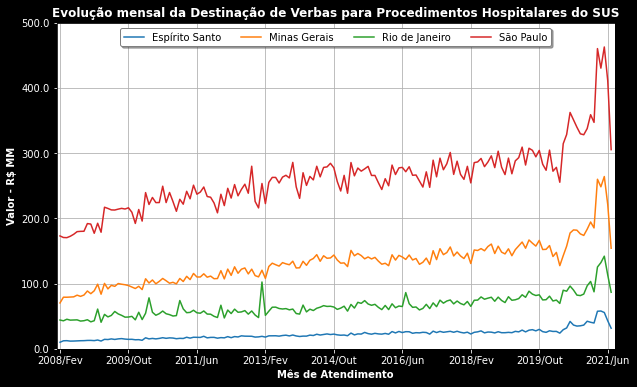

In [102]:
# Construindo grafico dos estados do sudeste
ax = sudeste.T.plot(figsize=(10,6))
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=4, fancybox=True, shadow=True)
# definindo limites do eixo x
ax.set_xlim(-1, 162)
ax.set_ylim(0, 500*escalaY)
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS", fontweight="bold", color="white")
plt.grid()
plt.show()

In [103]:
# adicionando estado na base do sudeste
estadoAdd = dados.loc[dados['Unidade da Federação'] == "Bahia"]
estadoAdd = estadoAdd [col_usaveis]
estadoAdd = estadoAdd.set_index("Unidade da Federação")
sudesteAdd1 = sudeste.append(estadoAdd)
# validações
sudesteAdd1

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Espírito Santo,"10,032,886.43","12,262,049.08","12,453,466.98","11,789,786.09","11,889,687.35","12,205,584.14","12,384,068.19","12,486,952.61","12,846,257.93","12,885,677.54","12,531,576.01","13,448,667.55","11,902,752.05","14,490,295.47","14,203,837.61","15,160,988.21","14,348,102.03","15,198,601.34","15,633,491.30","14,884,339.35","14,470,016.36","14,561,150.72","13,832,954.49","14,019,840.33","13,041,820.98","16,875,676.05","15,184,135.29","15,913,263.87","15,189,197.44","15,929,495.86","17,000,988.44","16,055,300.15","16,763,684.01","16,487,379.66","15,459,495.21","16,030,031.21","15,811,419.60","17,702,137.74","16,397,384.20","17,707,422.11",...,"25,975,106.39","27,444,564.56","24,444,622.13","25,716,796.37","25,498,522.61","24,338,227.14","26,158,845.99","24,671,664.41","24,683,685.86","25,201,039.31","24,710,171.75","26,740,727.97","25,983,304.03","28,690,916.87","25,936,888.97","28,550,512.79","29,319,469.90","27,519,132.91","29,788,885.15","26,294,165.36","25,250,918.87","27,615,604.26","26,601,451.82","26,689,904.87","24,003,052.09","29,290,756.45","31,972,932.63","41,934,293.90","36,405,257.36","34,820,715.37","35,249,673.88","36,364,662.17","42,256,604.54","40,664,905.15","39,529,966.31","57,568,004.47","57,934,683.92","55,638,184.50","42,933,342.84","31,538,501.89"
Minas Gerais,"70,301,089.50","79,119,005.51","79,046,322.41","79,268,070.12","79,626,793.50","82,215,689.64","80,374,117.08","82,415,611.96","88,613,476.60","84,486,996.11","88,928,630.30","99,018,155.84","83,675,119.83","100,266,328.26","91,831,325.37","97,289,703.07","95,723,396.53","100,050,008.70","98,995,348.51","98,202,119.08","96,962,394.27","94,767,639.13","92,412,770.73","95,806,556.42","90,764,890.28","107,389,850.03","100,835,953.45","105,501,032.97","99,666,115.96","103,377,831.80","107,844,259.69","104,341,138.19","100,525,403.88","101,943,625.50","99,538,953.60","107,806,930.69","103,166,545.72","111,095,256.09","106,094,329.28","115,487,199.35",...,"150,711,186.69","153,607,663.82","150,268,981.79","156,810,300.19","160,555,585.84","146,099,653.28","157,302,905.14","148,172,783.99","145,462,168.90","153,279,085.45","142,715,419.43","151,999,837.70","157,959,772.67","163,691,633.12","154,208,258.12","166,818,341.72","161,885,848.63","157,462,480.85","166,197,376.39","152,186,016.11","152,501,118.26","158,295,477.44","141,469,843.08","147,783,983.53","127,474,564.42","142,760,459.40","157,361,944.69","177,506,208.89","182,247,003.24","181,803,356.92","176,155,629.67","173,787,241.10","183,341,457.10","194,365,821.13","185,286,622.03","259,898,336.39","248,331,255.50","264,091,544.11","221,215,255.11","154,160,802.91"
Rio de Janeiro,"44,128,159.73","42,906,751.59","45,314,103.83","43,951,349.46","44,117,011.84","44,360,299.24","42,502,172.22","43,066,461.47","44,553,314.55","41,351,511.51","43,035,933.29","60,886,702.38","40,675,982.53","52,753,544.47","48,919,409.33","51,183,303.17","57,242,242.35","53,485,657.68","51,251,483.43","48,495,380.90","48,692,051.51","49,723,581.08","44,413,423.34","55,993,709.91","44,834,836.15","54,474,729.37","78,136,237.28","56,044,083.92","51,435,826.33","53,873,907.49","57,867,285.17","53,736,019

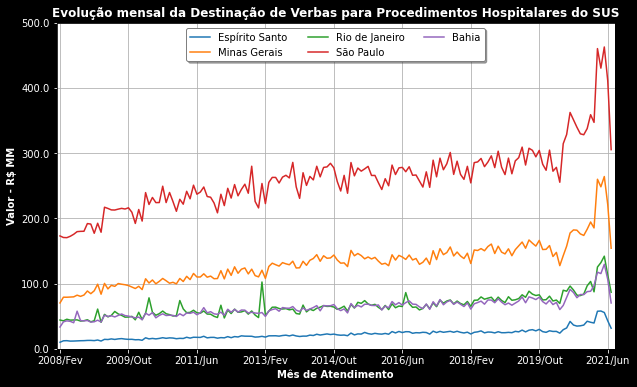

In [104]:
# Construindo grafico dos estados do sudeste mais 1
ax = sudesteAdd1.T.plot(figsize=(10,6))
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
# ajustando a posição da legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1),
          ncol=3, fancybox=True, shadow=True)
# definindo limites do eixo x
ax.set_xlim(-1, 162)
ax.set_ylim(0, 500*escalaY)
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("Mês de Atendimento", fontweight="bold", color="white")
plt.title("Evolução mensal da Destinação de Verbas para Procedimentos Hospitalares do SUS", fontweight="bold", color="white")
plt.grid()
plt.show()